In [1]:
import spacy

In [2]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [3]:
text = ("vivo's gaming sub-brand iQOO is expected to bring a new flagship soon. We not get to see a leaked photo of it showing the punch hole for the selfie camera in the upper right corner of the display." 
        "The vivo iQOO 3 sits next to an Oppo smartphone that looks lik")
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ["vivo's gaming sub-brand", 'iQOO', 'a new flagship', 'We', 'a leaked photo', 'it', 'the punch hole', 'the selfie camera', 'the upper right corner', 'the display', 'The vivo', 'iQOO', 'an Oppo smartphone']
Verbs: ['game', 'expect', 'bring', 'get', 'see', 'leak', 'show', 'sit', 'look']
vivo GPE
selfie PERSON
3 CARDINAL
Oppo ORG


# Using kmeans clustering

In [4]:
import numpy as np
import pandas as pd
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [5]:
q=open('../data/news.json','r',encoding="utf8");
data = json.load(q)
q.close()

In [6]:
data

{'status': 'ok',
 'totalResults': 38,
 'articles': [{'source': {'id': None, 'name': 'Youtube.com'},
   'author': None,
   'title': 'Hope for slowing spread of coronavirus in China - Sky News Australia',
   'description': 'There are hopes the spread of COVID-19 coronavirus in China is slowing after local authorities reported a sharp decline in the number of new cases. There wer...',
   'url': 'https://www.youtube.com/watch?v=gZAbr0F4tcw',
   'urlToImage': 'https://i.ytimg.com/vi/gZAbr0F4tcw/maxresdefault.jpg',
   'publishedAt': '2020-02-22T20:28:40Z',
   'content': '[[getSimpleString(data.title)]]\r\n[[getSimpleString(data.description)]]\r\n[[getSimpleString(data.videoCountText)]]'},
  {'source': {'id': 'the-times-of-india', 'name': 'The Times of India'},
   'author': 'TNN',
   'title': 'Uddhav’s new allies ask him to review stand on CAA-NPR - Times of India',
   'description': 'India News: A day after chief minister Uddhav Thackeray once again made clear his support for CAA and NPR in 

In [7]:
desc=[]
for i in np.arange(20):
    desc.append(data['articles'][i]['title']);
    desc.append(data['articles'][i]['description']);
    desc.append(data['articles'][i]['content']);

In [8]:
desc

['Hope for slowing spread of coronavirus in China - Sky News Australia',
 'There are hopes the spread of COVID-19 coronavirus in China is slowing after local authorities reported a sharp decline in the number of new cases. There wer...',
 '[[getSimpleString(data.title)]]\r\n[[getSimpleString(data.description)]]\r\n[[getSimpleString(data.videoCountText)]]',
 'Uddhav’s new allies ask him to review stand on CAA-NPR - Times of India',
 'India News: A day after chief minister Uddhav Thackeray once again made clear his support for CAA and NPR in New Delhi following his meeting with PM Narendra Modi',
 'Copyright © 2020 Bennett, Coleman &amp; Co. Ltd. All rights reserved. For reprint rights: Times Syndication Service',
 'Samsung Galaxy S20 Ultra Unboxing and Camera Test - PhoneArena',
 'CAMERA TEST starts at 3:42 Galaxy S20 Ultra Charging Speed Test: https://www.phonearena.com/news/Samsung-Galaxy-S20-Ultra-Charging-Speed-Test_id122463 Galaxy...',
 '[[getSimpleString(data.title)]]\r\n[[getSimp

In [9]:
#for i in desc:
#    if(desc[i]==Null)
d=pd.DataFrame(desc,columns=['description'])  

In [10]:
d

,description
0,Hope for slowing spread of coronavirus in Chin...
1,There are hopes the spread of COVID-19 coronav...
2,[[getSimpleString(data.title)]]\r\n[[getSimple...
3,Uddhav’s new allies ask him to review stand on...
4,India News: A day after chief minister Uddhav ...
5,"Copyright © 2020 Bennett, Coleman &amp; Co. Lt..."
6,Samsung Galaxy S20 Ultra Unboxing and Camera T...
7,CAMERA TEST starts at 3:42 Galaxy S20 Ultra Ch...
8,[[getSimpleString(data.title)]]\r\n[[getSimple...
9,"India vs Australia, FIH Hockey Pro League 2020..."


In [11]:
d=d.dropna()

In [12]:
d=d['description'].tolist()

In [13]:
vectorizer = TfidfVectorizer(max_features=200000,use_idf=True,stop_words='english')
X = vectorizer.fit_transform(d)
print(X)

  (0, 56)	0.33588770042332133
  (0, 305)	0.28967211991868597
  (0, 417)	0.42598680913135384
  (0, 94)	0.31795997378158514
  (0, 112)	0.2780904830381504
  (0, 432)	0.33588770042332133
  (0, 419)	0.3861173183879191
  (0, 217)	0.42598680913135384
  (1, 503)	0.2785676533013166
  (1, 87)	0.25249560074794164
  (1, 303)	0.17507823091880645
  (1, 310)	0.2785676533013166
  (1, 126)	0.2785676533013166
  (1, 406)	0.2785676533013166
  (1, 370)	0.2785676533013166
  (1, 57)	0.2785676533013166
  (1, 263)	0.2785676533013166
  (1, 7)	0.21964869914750948
  (1, 115)	0.21964869914750948
  (1, 218)	0.2785676533013166
  (1, 94)	0.20792513251923858
  (1, 112)	0.1818530799658636
  (1, 432)	0.21964869914750948
  (1, 419)	0.25249560074794164
  (2, 485)	0.23503027040996244
  :	:
  (54, 30)	0.19004121025880907
  (54, 381)	0.19004121025880907
  (54, 369)	0.19004121025880907
  (54, 484)	0.19004121025880907
  (54, 40)	0.19004121025880907
  (54, 378)	0.19004121025880907
  (54, 47)	0.19004121025880907
  (54, 125)	0.19

In [14]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=300, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [16]:
terms

['000',
 '100',
 '1013',
 '1381',
 '1584',
 '1651',
 '1668',
 '19',
 '2020',
 '2317',
 '233',
 '24',
 '25',
 '2610',
 '3415',
 '3947',
 '4044',
 '42',
 '46',
 '46000',
 '5g',
 '60',
 '60000',
 '80',
 '838',
 '879',
 '96',
 'accounts',
 'activists',
 'actor',
 'added',
 'administration',
 'advanced',
 'afp',
 'age',
 'aged',
 'ago',
 'agra',
 'aids',
 'alarm',
 'allegedly',
 'alliance',
 'allies',
 'alpha',
 'american',
 'amit',
 'amp',
 'andheri',
 'announce',
 'announced',
 'apparent',
 'appears',
 'ask',
 'atmosphere',
 'attack',
 'attempting',
 'australia',
 'authorities',
 'available',
 'avoidance',
 'avoiding',
 'ayus',
 'ayushmann',
 'beat',
 'beating',
 'believed',
 'bennett',
 'berkshire',
 'bhangra',
 'bharat',
 'billionaire',
 'bird',
 'birendra',
 'bollywood',
 'boost',
 'brands',
 'brilliant',
 'bringing',
 'buffett',
 'caa',
 'cal',
 'calculation',
 'california',
 'called',
 'caltech',
 'camera',
 'campaign',
 'cases',
 'challenge',
 'charging',
 'charlie',
 'chars',
 'cha

In [17]:
for i in range(true_k):
    print("-------------") 
    print(i)
    print("-------------")
    for ind in order_centroids[i, :20]:
        print( terms[ind])

-------------
0
-------------
coronavirus
new
china
19
covid
spread
feature
treatments
tcm
chrome
linking
deep
says
slowing
cases
effort
news
reason
economic
boost
-------------
1
-------------
singh
india
mika
manager
samy
australia
saumya
drug
overdose
police
manmohan
bharat
misused
ki
jai
militant
mata
construct
nationalism
idea
-------------
2
-------------
getsimplestring
trump
data
nasa
donald
rights
agra
buffett
times
galaxy
jupiter
water
com
day
key
silver
world
s20
ultra
test
-------------
3
-------------
mi
alpha
mix
select
xiaomi
india
neowin
stores
yesterday
soon
smartphone
available
postponed
foldable
plans
company
outlets
hit
announced
homes


Dimensionality reduction using Multidimensional scaling (MDS)

In [18]:
distance = 1 - cosine_similarity(X)

In [19]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(distance)
xs, ys = pos[:, 0], pos[:, 1]

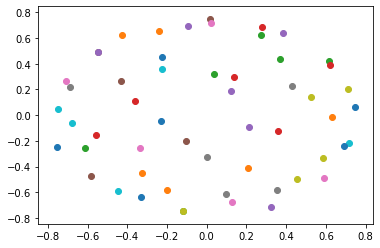

In [20]:
for x, y, in zip(xs, ys):
    plt.scatter(x, y)

kmean clustering visualization

In [21]:
labels = model.labels_
clusters = labels.tolist()
df1 = pd.DataFrame(dict(label=clusters, data=d, x=xs, y=ys))
label_color_map = {0: 'red',
1: 'blue',
2: 'black',
3: 'green'
}
df1


,label,data,x,y
0,0,Hope for slowing spread of coronavirus in Chin...,-0.228809,-0.042552
1,0,There are hopes the spread of COVID-19 coronav...,-0.324813,-0.452412
2,2,[[getSimpleString(data.title)]]\r\n[[getSimple...,-0.119077,-0.748494
3,0,Uddhav’s new allies ask him to review stand on...,0.357187,-0.120185
4,2,India News: A day after chief minister Uddhav ...,0.211430,-0.090748
5,2,"Copyright © 2020 Bennett, Coleman &amp; Co. Lt...",-0.548941,0.489386
6,2,Samsung Galaxy S20 Ultra Unboxing and Camera T...,-0.707498,0.268279
7,2,CAMERA TEST starts at 3:42 Galaxy S20 Ultra Ch...,-0.687127,0.222304
8,2,[[getSimpleString(data.title)]]\r\n[[getSimple...,-0.119077,-0.748494
9,1,"India vs Australia, FIH Hockey Pro League 2020...",-0.224923,0.354917


C:\Users\Vraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


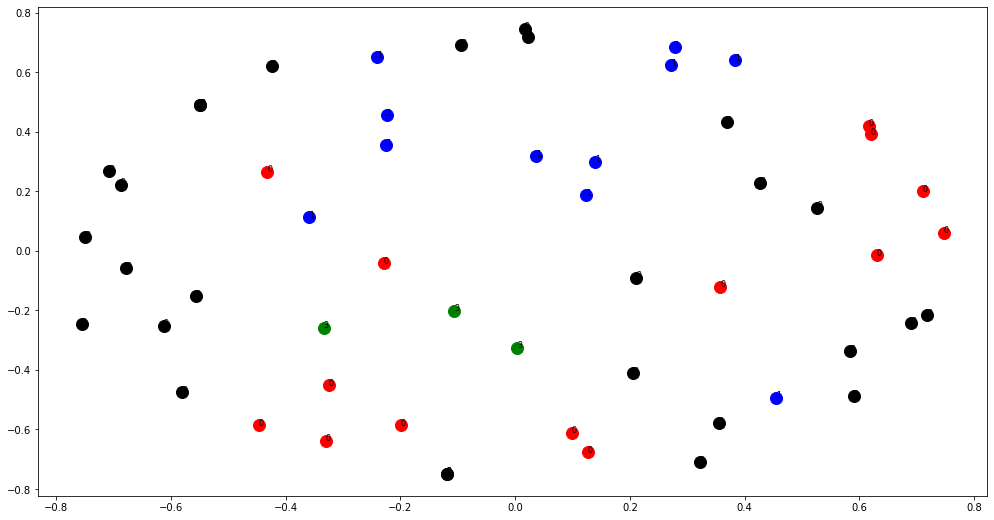

In [22]:
fig, ax = plt.subplots(figsize=(17, 9))
for index, row in df1.iterrows():
    cluster = row['label']
    label_color = label_color_map[row['label']]
    label_text = row['data']
    ax.plot(row['x'], row['y'], marker='o', ms=12, c=label_color)
for i in range(len(df1)):
    ax.text(df1.ix[i]['x'], df1.ix[i]['y'], df1.ix[i]['label'], size=8)

In [23]:
print("Prediction")
X = vectorizer.transform(d)
predicted = model.predict(X)
np.column_stack((predicted,d))

Prediction


array([['0',
        'Hope for slowing spread of coronavirus in China - Sky News Australia'],
       ['0',
        'There are hopes the spread of COVID-19 coronavirus in China is slowing after local authorities reported a sharp decline in the number of new cases. There wer...'],
       ['2',
        '[[getSimpleString(data.title)]]\r\n[[getSimpleString(data.description)]]\r\n[[getSimpleString(data.videoCountText)]]'],
       ['0',
        'Uddhav’s new allies ask him to review stand on CAA-NPR - Times of India'],
       ['2',
        'India News: A day after chief minister Uddhav Thackeray once again made clear his support for CAA and NPR in New Delhi following his meeting with PM Narendra Modi'],
       ['2',
        'Copyright © 2020 Bennett, Coleman &amp; Co. Ltd. All rights reserved. For reprint rights: Times Syndication Service'],
       ['2',
        'Samsung Galaxy S20 Ultra Unboxing and Camera Test - PhoneArena'],
       ['2',
        'CAMERA TEST starts at 3:42 Galaxy S20 Ultr

In [47]:
l=predicted==df1["label"]
print(predicted==df1["label"])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
51    True
52    True
53    True
54    True
Name: label, dtype: bool


# Using DBscan clustering

In [24]:
from sklearn.cluster import DBSCAN 

from sklearn.preprocessing import StandardScaler 

from sklearn.preprocessing import normalize 

from sklearn.decomposition import PCA

In [25]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df1[['x','y']])

In [26]:
X_scaled

array([[-0.5110879 , -0.09479367],
       [-0.72553148, -1.0078346 ],
       [-0.26598053, -1.66741484],
       [ 0.79784634, -0.26773454],
       [ 0.4722689 , -0.20215861],
       [-1.22616589,  1.09020038],
       [-1.58033212,  0.59764224],
       [-1.53483044,  0.49522537],
       [-0.26598053, -1.66741484],
       [-0.50240932,  0.79064528],
       [-0.50072584,  1.01436665],
       [-0.53822325,  1.45035436],
       [ 0.82400979,  0.96471685],
       [-0.8031381 ,  0.25125368],
       [-1.22616589,  1.09020038],
       [-1.29645814, -1.05899259],
       [ 1.31778937, -1.08754108],
       [ 0.79186045, -1.29089243],
       [ 1.58646282,  0.44764969],
       [-1.67472623,  0.10263201],
       [ 1.66928575,  0.1347226 ],
       [-0.94839792,  1.3800847 ],
       [-1.36837394, -0.56116515],
       [-1.24429232, -0.34020156],
       [ 0.71775291, -1.58428871],
       [-0.96498936,  0.5924524 ],
       [ 0.28355621, -1.50536471],
       [ 0.22079062, -1.36158684],
       [ 1.01706384,

In [27]:
X_normalized = normalize(X_scaled)

In [28]:
X_normalized = pd.DataFrame(X_normalized)

In [29]:
pca = PCA(n_components = 2) 

X_principal = pca.fit_transform(X_normalized) 

X_principal = pd.DataFrame(X_principal) 

X_principal.columns = ['P1', 'P2'] 

print(X_principal.head()) 

         P1        P2
0  0.698543 -0.716769
1  1.001538 -0.036115
2  0.911741  0.416635
3 -0.257849  0.966553
4 -0.179169  0.984375


In [30]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_scaled) 

labels1 = db_default.labels_ 
labels1

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1], dtype=int64)

In [31]:
colours = {} 

colours[0] = 'r'

colours[1] = 'g'

colours[2] = 'b'

colours[-1] = 'k'

  
# Building the colour vector for each data point 

cvec = [colours[label] for label in labels] 

  
# For the construction of the legend of the plot 

r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r'); 

g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g'); 

b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b'); 

k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
plt.figure(figsize =(9, 9)) 

plt.scatter(X_principal['P1'], X_principal['P2'],c = cvec) 

  
# Building the legend 

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 

  
plt.show() 

KeyError: 3